In [95]:
import numpy as np
import matplotlib.pyplot as plt
from polychrom.hdf5_format import list_URIs, load_URI
from polychrom.polymer_analyses import calculate_contacts
from polychrom.polymer_analyses import contact_scaling
from polychrom.contactmaps import monomerResolutionContactMap
from polychrom.polymer_analyses import slope_contact_scaling

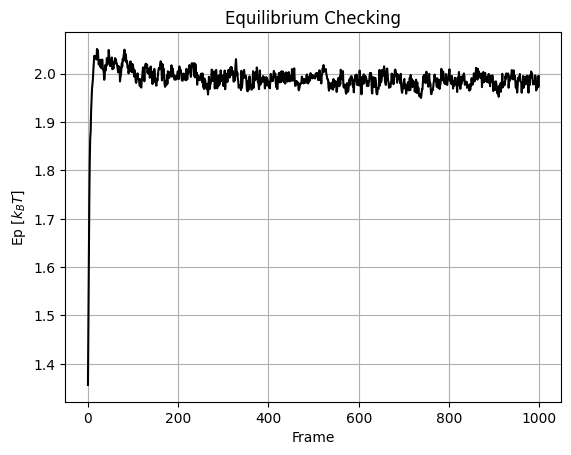

In [96]:
folder = "trajectory_20260222_185839" #you can write your own trajectory

uris = list_URIs(folder)

#print(len(uris))  #total_frames

#frame0 = load_URI(uris[0])
#print(frame0.keys())
#print(frame0["pos"].shape)

Ek = []
Ep = []

for uri in uris:
    d = load_URI(uri)
    Ek.append(d["kineticEnergy"])
    Ep.append(d["potentialEnergy"])

plt.plot(Ep, color = "black")
plt.grid()
plt.xlabel("Frame")
plt.ylabel("Ep [$k_{B}T$]")
plt.title("Equilibrium Checking")
plt.show()

In [97]:
uris_eq = uris[100:] #from frame 100 to 999

In [98]:
cutoff = 1.5

In [99]:
vmin = -10
vmax = 4
#you can change the number
xlim = 2000
ylim = 2000

In [100]:
contactmap = monomerResolutionContactMap(
    uris_eq,
    cutoff=cutoff,
    n=8           #parallel processing
) #/ len(uris_eq) (you can divide if you want to average...)

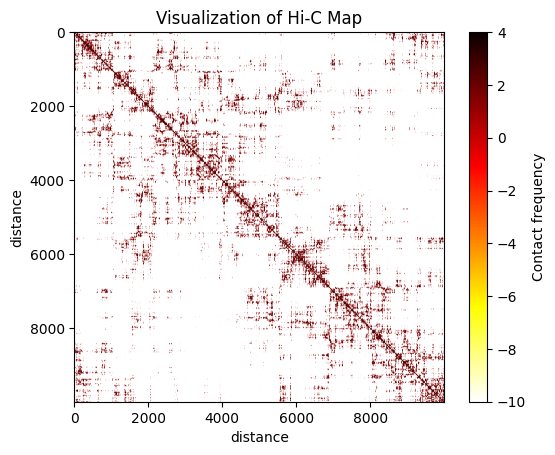

In [101]:
plt.imshow(np.log(contactmap+1e-6), cmap="hot_r", vmin = vmin, vmax = vmax, origin = "upper")
plt.title("Visualization of Hi-C Map")
plt.ylabel("distance")
plt.xlabel("distance")
plt.colorbar(label = "Contact frequency")
plt.show()

In [102]:
submap = np.log(contactmap+1e-6)[0:xlim,0:ylim]

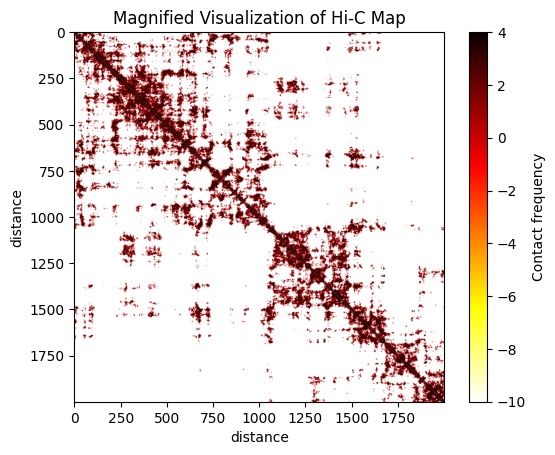

In [103]:
plt.imshow(submap, cmap="hot_r", vmin = vmin, vmax = vmax, origin = "upper")
plt.title("Magnified Visualization of Hi-C Map")
plt.ylabel("distance")
plt.xlabel("distance")
plt.colorbar(label = "Contact frequency")
plt.show()

In [104]:
ps_list = []
for i in uris_eq:
    d = load_URI(i)
    pos = d["pos"]

    mids, ps = contact_scaling(pos, cutoff = cutoff)
    ps_list.append(ps)

ps_avg = np.mean(ps_list, axis = 0)

In [105]:
ps_array = np.array(ps_list)   # (n_frames, n_bins)

ps_mean = ps_array.mean(axis=0)
ps_std  = ps_array.std(axis=0)
#ps_sem = ps_std / np.sqrt(ps_array.shape[0])

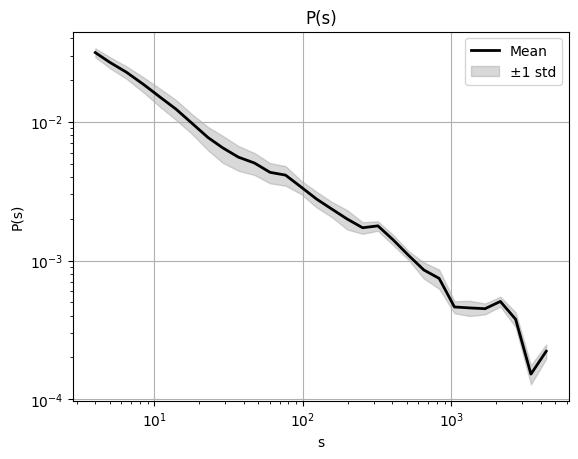

In [106]:
plt.figure()

plt.loglog(mids[:30], ps_mean[:30], color="black", lw=2, label="Mean")

plt.fill_between(
    mids[:30],
    ps_mean[:30] - ps_std[:30],
    ps_mean[:30] + ps_std[:30],
    color="gray",
    alpha=0.3,
    label="±1 std"
)

plt.grid()
plt.xlabel("s")
plt.ylabel("P(s)")
plt.title("P(s)")
plt.legend()
plt.show()

In [107]:
mids2, slope = slope_contact_scaling(mids, ps_mean)

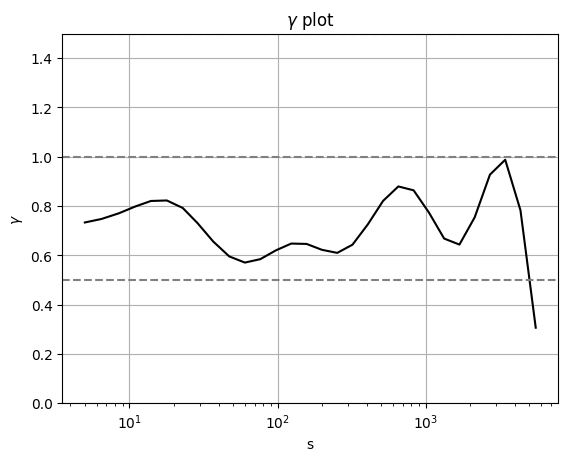

In [109]:
plt.figure()
plt.plot(mids2[:30], -slope[:30], color="black")
plt.xscale("log")
plt.xlabel("s")
plt.ylabel("$\\gamma$")
plt.title("$\\gamma$ plot")
plt.axhline(1,  ls="--", color="gray")
plt.axhline(1.5,ls="--", color="gray")
plt.axhline(0.5,  ls="--", color="gray")
plt.ylim([0,1.5])
plt.grid()
plt.show()